In [87]:
import cv2 
import numpy as np 

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20, 8)

In [85]:
def remove_shadow_effect(img):
    rgb_planes = cv2.split(img)

    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)

    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)
    
    return result_norm

In [32]:
def plot_img_and_thresh(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
    
    plot_two_images(img, "Origianl Image", thresh, "Thresholded Image")
    
def plot_two_images(img1, title1, img2, title2):
    plt.subplot(121)
    plt.imshow(img1)
    plt.title(title1)
    
    plt.subplot(122)
    if img2.ndim == 2:
        plt.imshow(img2, cmap="gray")
    else:
        plt.imshow(img2)
    plt.title(title2)

## First, let's look at the image which doesn't have any shadow effect.  

In [89]:
img1 = cv2.imread("images/ideal.png")

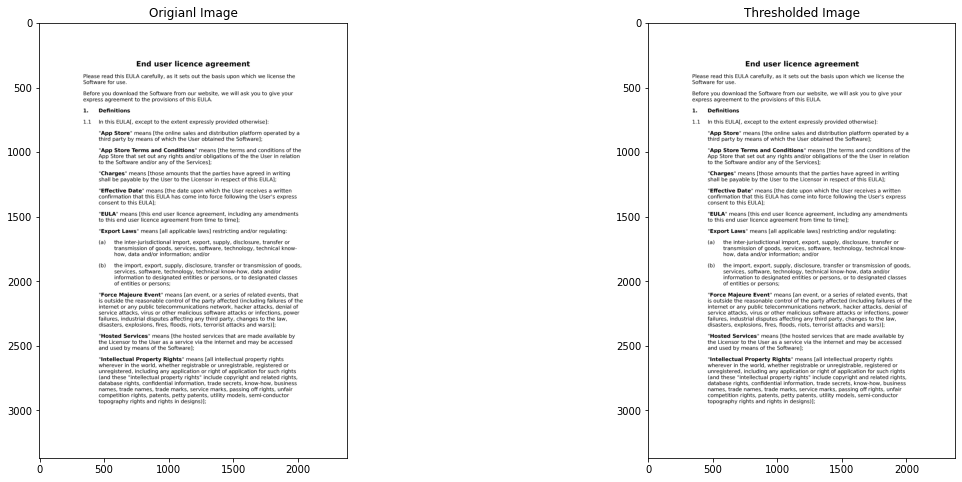

In [90]:
plot_img_and_thresh(img1)

## For an image having shadow effect. 

In [91]:
img2 = cv2.imread("images/shadow1.png")



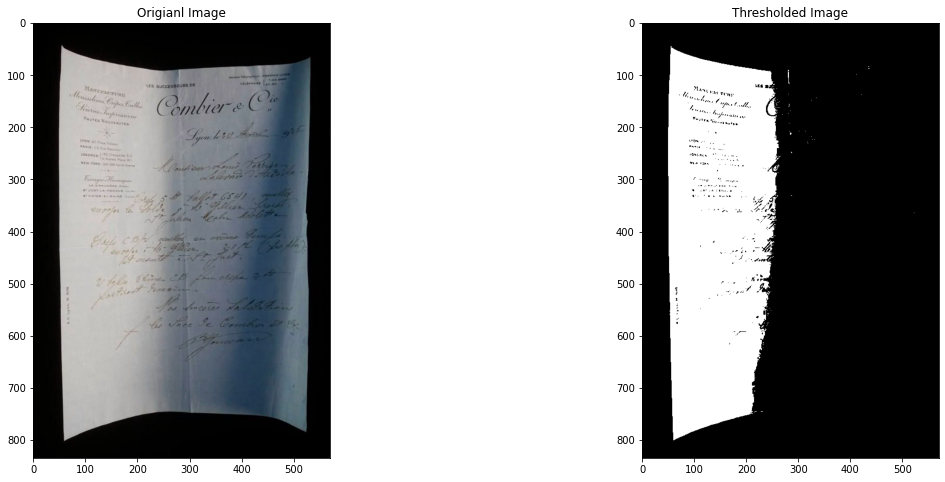

In [92]:
plot_img_and_thresh(img2)

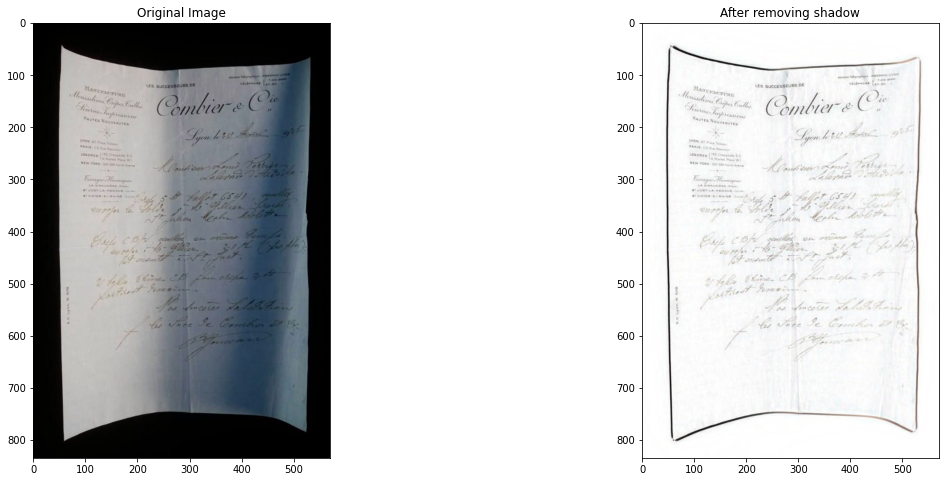

In [93]:
result = remove_shadow_effect(img2)


plot_two_images(img2, "Original Image", result, "After removing shadow")

## Another example 

In [94]:
img3 = cv2.imread("images/shadow2.png")


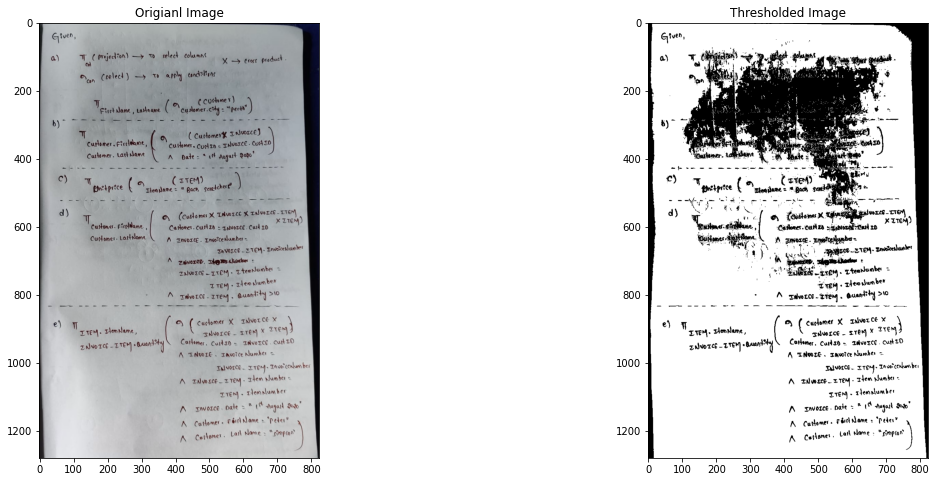

In [95]:
plot_img_and_thresh(img3)

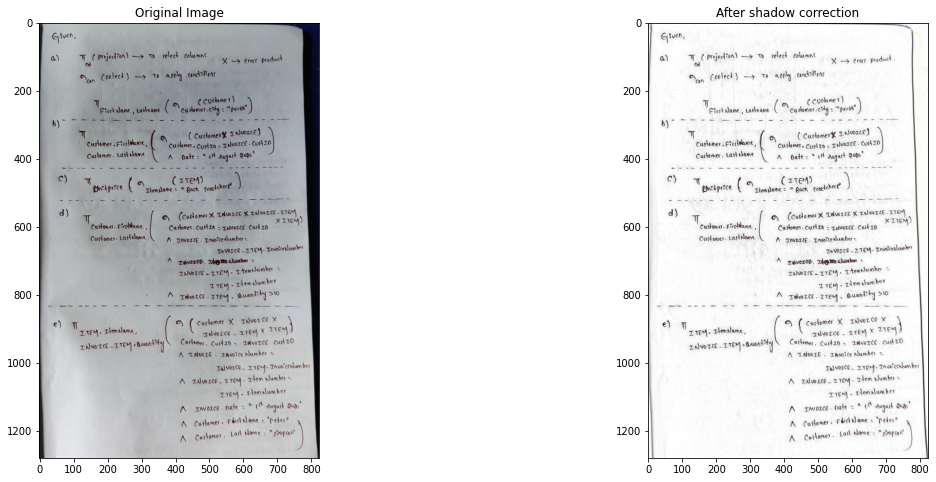

In [96]:
result = remove_shadow_effect(img3)

plot_two_images(img3, "Original Image", result, "After shadow correction")